In [97]:
import cv2
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt
import re
from PIL import ImageEnhance , Image
from google.colab.patches import cv2_imshow

In [98]:
# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()
 
# Change thresholds
params.minThreshold = 150;
params.maxThreshold = 255;
 
# Filter by Area.
params.filterByArea = True
params.minArea = 50
 
# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.3
 
# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.7
 
# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.09
 
# Create a detector with the parameters
ver = (cv2.__version__).split('.')
if int(ver[0]) < 3 :
  detector = cv2.SimpleBlobDetector(params)
else : 
  detector = cv2.SimpleBlobDetector_create(params)

In [99]:
def Blob_image(img,detector):

  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  blur = cv2.GaussianBlur(img_rgb, (11,11), 0)  # improve

  lab = cv2.cvtColor(blur, cv2.COLOR_BGR2LAB)

  l_component = lab[:, :, 0]

  keypoints= detector.detect(l_component)

  #blob_sizes = [kp.size for kp in keypoints]
  img = img.copy()
  for x in range(1,len(keypoints)):
    img=cv2.circle(img, (np.int(keypoints[x].pt[0]),np.int(keypoints[x].pt[1])), radius=np.int(keypoints[x].size), color=(0,0,0), thickness=-1)

  return img 

In [100]:
def map_img(blob_img,original_image):
  
  kernel = np.ones((7,7), np.uint8)

  # Apply dilation
  dilated_img = cv2.dilate(blob_img, kernel, iterations=1)

  gray = cv2.cvtColor(dilated_img, cv2.COLOR_BGR2GRAY) 

  # Apply Gaussian blurring
  blurred = cv2.GaussianBlur(gray, (7, 7), 0)
  
  #thresholding
  thresholdImage = cv2.adaptiveThreshold(blurred, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY ,11,3)

  # Detect edges using Canny Edge Detection
  edges = cv2.Canny(thresholdImage, 140, 255,5)

  # Find contours in the image
  contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  # Filter the contours
  filtered_contours = []
  for contour in contours:
    x,y,w,h = cv2.boundingRect(contour)
    if h < 120 and w < 120:
      #filtered_contours.append(contour)
      if cv2.contourArea(contour) > 100:
        filtered_contours.append(contour)

  # Draw rectangles around the contours
  for contour in filtered_contours:
      x, y, w, h = cv2.boundingRect(contour)
      cv2.rectangle(blob_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
      cv2.rectangle(original_image, (x, y), (x + w, y + h), (0, 255, 0), 2)

  return blob_img, original_image, edges, thresholdImage

In [101]:
filepath = '/content/drive/MyDrive/Project_Images/Remapped_Images/'
for i in range(1,13):
  img_101 = cv2.imread('/content/drive/MyDrive/Project_Images/Photos/mole_img_{0}.jpg'.format(i))
  blob_image = Blob_image(img_101,detector)
  blob_img, original_image, edges, thresholdImage = map_img(blob_image,img_101)

  cv2.imwrite(os.path.join(filepath, 'mapped_image_{0}.jpg'.format(i)), original_image)

<ipython-input-99-9b004b8773f6>:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img=cv2.circle(img, (np.int(keypoints[x].pt[0]),np.int(keypoints[x].pt[1])), radius=np.int(keypoints[x].size), color=(0,0,0), thickness=-1)


Run algorithm through blob detection<br>
Run algorithm through adaptive thresholding

In [95]:
img_101 = cv2.imread('/content/drive/MyDrive/Project_Images/Photos/mole_img_5.jpg')
blob_image= Blob_image(img_101,detector)
blob_img, original_image, edges, thresholdImage = map_img(blob_image,img_101)
#cv2_imshow(blob_image)

<ipython-input-92-9b004b8773f6>:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img=cv2.circle(img, (np.int(keypoints[x].pt[0]),np.int(keypoints[x].pt[1])), radius=np.int(keypoints[x].size), color=(0,0,0), thickness=-1)


Text(0.5, 1.0, 'Mapped on Original Image')

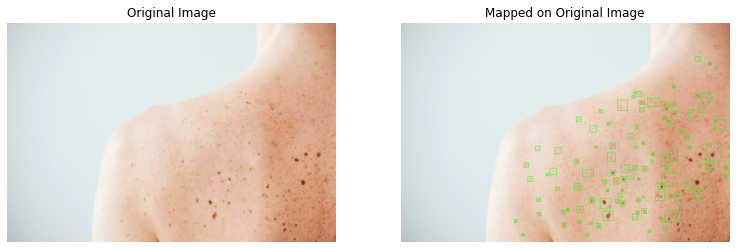

In [96]:

img_org = cv2.imread('/content/drive/MyDrive/Project_Images/Photos/mole_img_5.jpg')
plt.figure(figsize = (20,10))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img_org, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Mapped on Original Image')

In [ ]:
'''
for i in range(1,len(keypoints)):
  x,y = np.int(keypoints[i].pt[0]),np.int(keypoints[i].pt[1])
  sz = np.int(keypoints[i].size)
  if sz > 1:
      sz = np.int(sz/2)
  # notice there's no boundary check for pt1 and pt2, you have to do that yourself
  img = cv2.rectangle(img, (x-sz,y-sz), (x+sz,y+sz), color=(0,0,255), thickness=2)'''

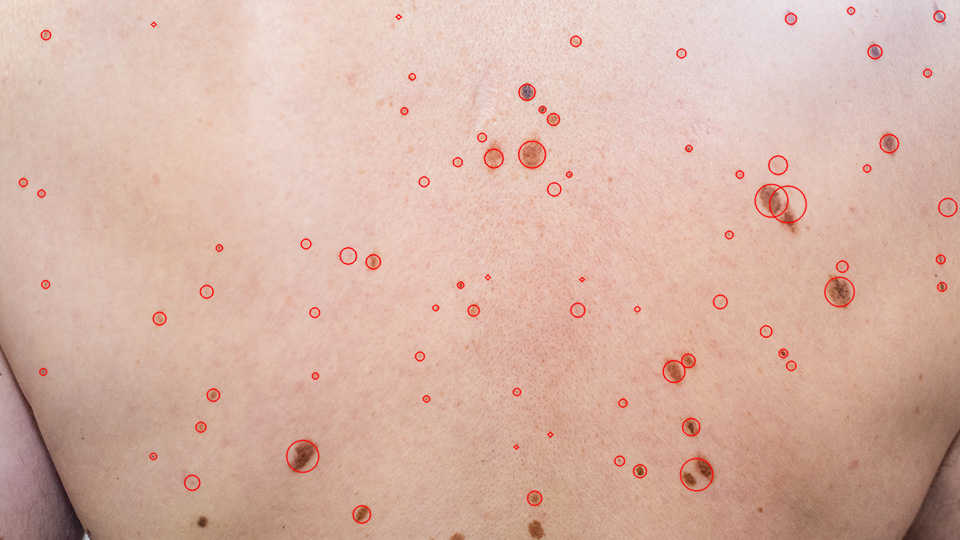

-1

In [ ]:
im = cv2.imread("/content/drive/MyDrive/Project_Images/Photos/mole_img_1.jpg")
#/content/resized image/resized_image.jpg
img_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
c = cv2.createCLAHE(clipLimit = 0.5 , tileGridSize = (16,16))
c1 = c.apply(img_gray)

blur = cv2.GaussianBlur(c1, (7,7), 0)
keypoints = detector.detect(blur)

# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Show keypoints
cv2_imshow(im_with_keypoints)
cv2.waitKey(0)

In [ ]:
kernel = np.ones((3,3),np.uint8)
erosion = cv2.erode(bin_img, kernel, iterations = 1)

In [ ]:
import cv2
import numpy as np

# Create a SimpleBlobDetector_Params object
params = cv2.SimpleBlobDetector_Params()

# Define the range of values to test for each parameter
min_area_range = [50, 100, 150, 200, 250]
min_circularity_range = [0.7, 0.8, 0.9, 1.0]

# Load an image
img = cv2.imread("blobs.jpg")

# Loop over all combinations of parameter values
for min_area in min_area_range:
    for min_circularity in min_circularity_range:
        params.minArea = min_area
        params.minCircularity = min_circularity
        
        # Create the blob detector with the current parameter values
        detector = cv2.SimpleBlobDetector_create(params)
        
        # Detect blobs in the image
        keypoints = detector.detect(img)
        
        # Draw keypoints on the image
        img_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        
        # Display the result
        cv2.imshow("Blobs (minArea={}, minCircularity={})".format(min_area, min_circularity), img_with_keypoints)
        cv2.waitKey(0)

cv2.destroyAllWindows()


In [ ]:
import cv2
import numpy as np

# Create a SimpleBlobDetector_Params object
params = cv2.SimpleBlobDetector_Params()

# Set the initial values for the parameters
params.minArea = 100
params.minCircularity = 0.9

# Create the blob detector
detector = cv2.SimpleBlobDetector_create(params)

# Load an image
img = cv2.imread("blobs.jpg")

# Detect blobs in the image
keypoints = detector.detect(img)

# Draw keypoints on the image
img_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the initial result
cv2.imshow("Blobs", img_with_keypoints)
cv2.waitKey(0)

# Update the parameters
params.minArea = 50
params.minCircularity = 0.8

# Recreate the blob detector with the updated parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs in the image again
keypoints = detector.detect(img)

# Draw keypoints on the image again
img_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the updated result
cv2.imshow("Blobs", img_with_keypoints)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
import matplotlib.pyplot as plt
import cv2
import datetime
import numpy as np
 
def drawBasicGrid(img, pxstep, colour):
    """
    adds horizontal and vertical lines on image input to mimic hemocytometer gridlines
    :param      img: 3d matrix of image
    :param      pxstep: pixel distance between gridlines
    :param      colour: colour of lines in RGB
    """
    x = pxstep 
    y = pxstep 
    #Draw all x lines
    while x < img.shape[1]:
        cv2.line(img, (x, 0), (x, img.shape[0]), color=colour, thickness=5)
        x += pxstep 
 
    # Draw all y lines
    while y < img.shape[0]:
        cv2.line(img, (0, y), (img.shape[1], y), color=colour,thickness=5)
        y += pxstep 
    cv2.line(img, (0,img.shape[0]), (img.shape[1],img.shape[0]), color = colour, thickness = 5) # bottom 
    cv2.line(img, (img.shape[1],img.shape[0]), (img.shape[1],0), color = colour, thickness = 5) # right
    cv2.line(img, (0,img.shape[0]), (0,0), color = colour, thickness = 5) # left
    cv2.line(img, (0,0), (img.shape[1],0), color = colour, thickness = 5) # top
 
def drawBottomRightLines(img):
    # add bottom and right outermost gridline to ignore cells on these lines
    cv2.line(img, (0,img.shape[0]), (img.shape[1],img.shape[0]), color = (52,52,52), thickness = 5) 
    cv2.line(img, (img.shape[1],img.shape[0]), (img.shape[1],0), color = (52,52,52), thickness = 5)
 
def thresholdingPreprocessing(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale for Otsu's thresholding
    ret, thresh = cv2.threshold(
      gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU) # apply otsu threshold
    kernel = np.ones((1,1),np.uint8)
    thresh = cv2.erode(thresh,kernel,iterations = 1) # apply erosion again to smooth cells so the cell wall is smooth
    return thresh
 
 
def contourdetector(image_path, mm_distance = 592, max_area_cells = 1500):
  """
  preprocesses image, performs Otsu's thresholding and connected components detection to derive cell count by hemocytometer method
  excludes cells on outermost bottom and right grid lines
  :param      image_path:  The image file path to jpg
  :param      mm_distance: number of pixels per mm
  :param      max_area_cells: maximum enclosed area that contour detector will accept for it to count as a cell
  returns an integer as the cell count of the image and gridded image with detected contours
  """
  image = cv2.imread(image_path)
  image = cv2.bitwise_not(image) 
 
  y=200
  x=500
 
  image = image[y:y+mm_distance, x:x+mm_distance] # use numpy slicing to execute the crop
  kernel = np.ones((2,2),np.uint8)
  sure_bg = cv2.erode(image,kernel,iterations = 1) # apply erosion filter
 
  ############### Contour Detection for Large Cells ###############
 
  drawBottomRightLines(sure_bg)
 
  thresh = thresholdingPreprocessing(sure_bg)
 
  cnts, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = [cnts[i] for i in range(len(cnts)) if hierarchy[0][i][2] == -1] # count contours with no child contours only
 
  ############### Contour Detection for Small Cells ###############
 
  # exclude large cells
  exclude_large_cells = image.copy()
  for c in cnts:
    area = cv2.contourArea(c)
    if 1500 > area > 90:
        cv2.drawContours(exclude_large_cells, [c], -1, (110, 110, 110), cv2.FILLED) # isolate small cells by removing large cells
        cv2.drawContours(exclude_large_cells, [c], -1, (110,110,110), 6) # draw border
 
  # contour detection
  thresh_small = thresholdingPreprocessing(exclude_large_cells)
 
  cnt_small, hierarchy_small = cv2.findContours(thresh_small, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnt_small = [cnt_small[i] for i in range(len(cnt_small)) if hierarchy_small[0][i][2] == -1] 
 
  ############### Contour Drawing for All Cells #######################
  white_dots = [] # used contours as blob detection is more suited for detecting black or grey blobs
 
  for c in cnt_small: 
    area = cv2.contourArea(c)
    if 90 > area > 0:
        cv2.drawContours(image, [c], -1, (36, 255, 12), 2)
        white_dots.append(c)
 
  for c in cnts:
      area = cv2.contourArea(c)
      if max_area_cells > area > 90 :
          cv2.drawContours(image, [c], -1, (36, 255, 12), 2)
          white_dots.append(c)
 
  drawBasicGrid(image, 148, (52, 52, 52)) # draw vertical and horizontal lines
 
  output_path = "app/static/capture/{}.jpg".format(datetime.datetime.now(), "%Y%m%d-%H%M%S")
 
  cv2.imwrite(output_path,image)
 
  return len(white_dots), output_path # returns cell count and image with drawn contours
  

Text(0.5, 1.0, 'Mapped on Original Image')

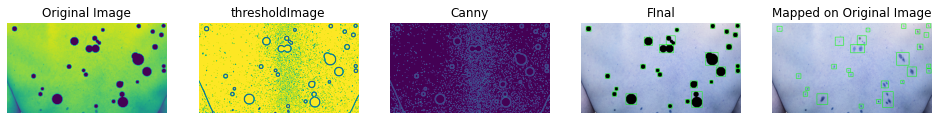

In [ ]:
import cv2
import numpy as np

image_101 = cv2.imread("/content/drive/MyDrive/Project_Images/Photos/mole_img_1.jpg")
plt.figure(figsize = (20,3))

plt.subplot(1, 6, 1)
img = cv2.imread("/content/savedImage.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.axis('off')
plt.title('Original Image')


# Apply Gaussian blurring
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

plt.subplot(1, 6, 2)
thresholdImage = cv2.adaptiveThreshold(blurred, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY ,11,3)
plt.imshow(thresholdImage)
plt.axis('off')
plt.title('thresholdImage')

# Detect edges using Canny Edge Detection
plt.subplot(1, 6, 3)
edges = cv2.Canny(thresholdImage, 150, 255,5)
plt.imshow(edges)
plt.axis('off')
plt.title('Canny')


# Find contours in the image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter the contours
filtered_contours = []
for contour in contours:
  x,y,w,h = cv2.boundingRect(contour)
  if h < 100 and w < 100:
    #filtered_contours.append(contour)
    if cv2.contourArea(contour) > 150:
      filtered_contours.append(contour)

# Draw rectangles around the contours
for contour in filtered_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(image_101, (x, y), (x + w, y + h), (0, 255, 0), 2)
# Show the image
plt.subplot(1, 6, 4)
plt.imshow(img)
plt.axis('off')
plt.title('FInal')


plt.subplot(1, 6, 5)
plt.imshow(image_101)
plt.axis('off')
plt.title('Mapped on Original Image')



Use erode or dilation technique <br>
sober/canny parameter optimzation <br>
cv2.contourArea(contour) > 150 (set the optimal value) <br>
fine tune daptive thresholding parameters like kernel size using size of the blob and "c" value also<br>
fine tune simple blob detection parameters<br>
use image enhancer if necessary along with tf.contrast<br>



Run algorithm through blob detection<br>
Run algorithm through adaptive thresholding<br>
Run algorithm through blob + adaptive + canny/sober<br>

In [ ]:
#original_image = cv2.imread('/content/drive/MyDrive/Project_Images/Photos/mole_img_2.jpg')
def Blob_image(img,detector):

  #img =cv2.imread('/content/drive/MyDrive/Project_Images/Photos/mole_img_2.jpg')

  #img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(img, (11, 11), 0)

  # convert to LAB color space
  lab = cv2.cvtColor(blur, cv2.COLOR_BGR2LAB)

  # get luminance channel
  l_component = lab[:, :, 0]

  #thresholdImage = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 7)  #thresholding 

  keypoints= detector.detect(l_component)

  # Draw detected blobs as red circles.
  # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
  #im_with_keypoints_1 = cv2.drawKeypoints(img, keypoints_1, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

  img = img.copy()
  for x in range(1,len(keypoints)):
    img=cv2.circle(img, (np.int(keypoints[x].pt[0]),np.int(keypoints[x].pt[1])), radius=np.int(keypoints[x].size), color=(0,0,0), thickness=-1)

  return img
# Show keypoints
#cv2_imshow(img)
#cv2.waitKey(0)
#filename = 'savedImage.jpg'
#save Image
#cv2.imwrite(filename,img)

In [ ]:
import cv2
import numpy as np

image_101 = cv2.imread("/content/drive/MyDrive/Project_Images/Photos/mole_img_2.jpg")
plt.figure(figsize = (20,3))

plt.subplot(1, 6, 1)
img = cv2.imread("/content/savedImage.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.axis('off')
plt.title('Original Image')


# Apply Gaussian blurring
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

plt.subplot(1, 6, 2)
thresholdImage = cv2.adaptiveThreshold(blurred, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY ,11,3)
plt.imshow(thresholdImage)
plt.axis('off')
plt.title('thresholdImage')

# Detect edges using Canny Edge Detection
plt.subplot(1, 6, 3)
edges = cv2.Canny(thresholdImage, 150, 255,5)
plt.imshow(edges)
plt.axis('off')
plt.title('Canny')


# Find contours in the image
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter the contours
filtered_contours = []
for contour in contours:
  x,y,w,h = cv2.boundingRect(contour)
  if h < 100 and w < 100:
    #filtered_contours.append(contour)
    if cv2.contourArea(contour) > 150:
      filtered_contours.append(contour)

# Draw rectangles around the contours
for contour in filtered_contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.rectangle(image_101, (x, y), (x + w, y + h), (0, 255, 0), 2)
# Show the image
plt.subplot(1, 6, 4)
plt.imshow(img)
plt.axis('off')
plt.title('FInal')


plt.subplot(1, 6, 5)
plt.imshow(image_101)
plt.axis('off')
plt.title('Mapped on Original Image')

